In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [12]:
''' 1. Data Loading'''
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Features
y = pd.Series(iris.target) # Target variable

print("--- Dataset Overview ---")
print("Dataset Features (X) Head:")
print(X.head())
print("\nDataset Target (y) Head:")
print(y.head())
print(f"\nTarget Names: {iris.target_names.tolist()}")
print(f"Feature Names: {iris.feature_names}")
print(f"Dataset Shape: {X.shape[0]} samples, {X.shape[1]} features")

--- Dataset Overview ---
Dataset Features (X) Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Target (y) Head:
0    0
1    0
2    0
3    0
4    0
dtype: int64

Target Names: ['setosa', 'versicolor', 'virginica']
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Shape: 150 samples, 4 features


In [13]:
'''2. Data Preprocessing'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n--- Data Split ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\nDistribution of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of classes in testing set:")
print(y_test.value_counts(normalize=True))


--- Data Split ---
Training set size: 105 samples
Testing set size: 45 samples

Distribution of classes in training set:
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64

Distribution of classes in testing set:
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64


In [14]:
'''3. Train Decision Tree Model'''
dtc = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)

dtc.fit(X_train, y_train)

print("\n--- Model Training ---")
print("Decision Tree Model Trained Successfully!")
print(f"Model parameters: {dtc.get_params()}")


--- Model Training ---
Decision Tree Model Trained Successfully!
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [15]:
'''4. Make Predictions'''
y_pred = dt_classifier.predict(X_test)

print("\n--- Predictions ---")
print("Sample Predictions (first 10 from test set):")
predictions_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 'Predicted': y_pred})
print(predictions_df.head(10))


--- Predictions ---
Sample Predictions (first 10 from test set):
   Actual  Predicted
0       2          2
1       1          1
2       2          2
3       1          2
4       2          2
5       2          2
6       1          1
7       1          1
8       0          0
9       2          2


In [16]:
'''5. Evaluate Model'''
print("\n--- Model Evaluation ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nInterpretation of Confusion Matrix:")
print(f"Rows: Actual classes ({iris.target_names[0]}, {iris.target_names[1]}, {iris.target_names[2]})")
print(f"Columns: Predicted classes ({iris.target_names[0]}, {iris.target_names[1]}, {iris.target_names[2]})")


--- Model Evaluation ---
Model Accuracy: 0.8889

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.86      0.80      0.83        15
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]

Interpretation of Confusion Matrix:
Rows: Actual classes (setosa, versicolor, virginica)
Columns: Predicted classes (setosa, versicolor, virginica)



--- Decision Tree Visualization ---


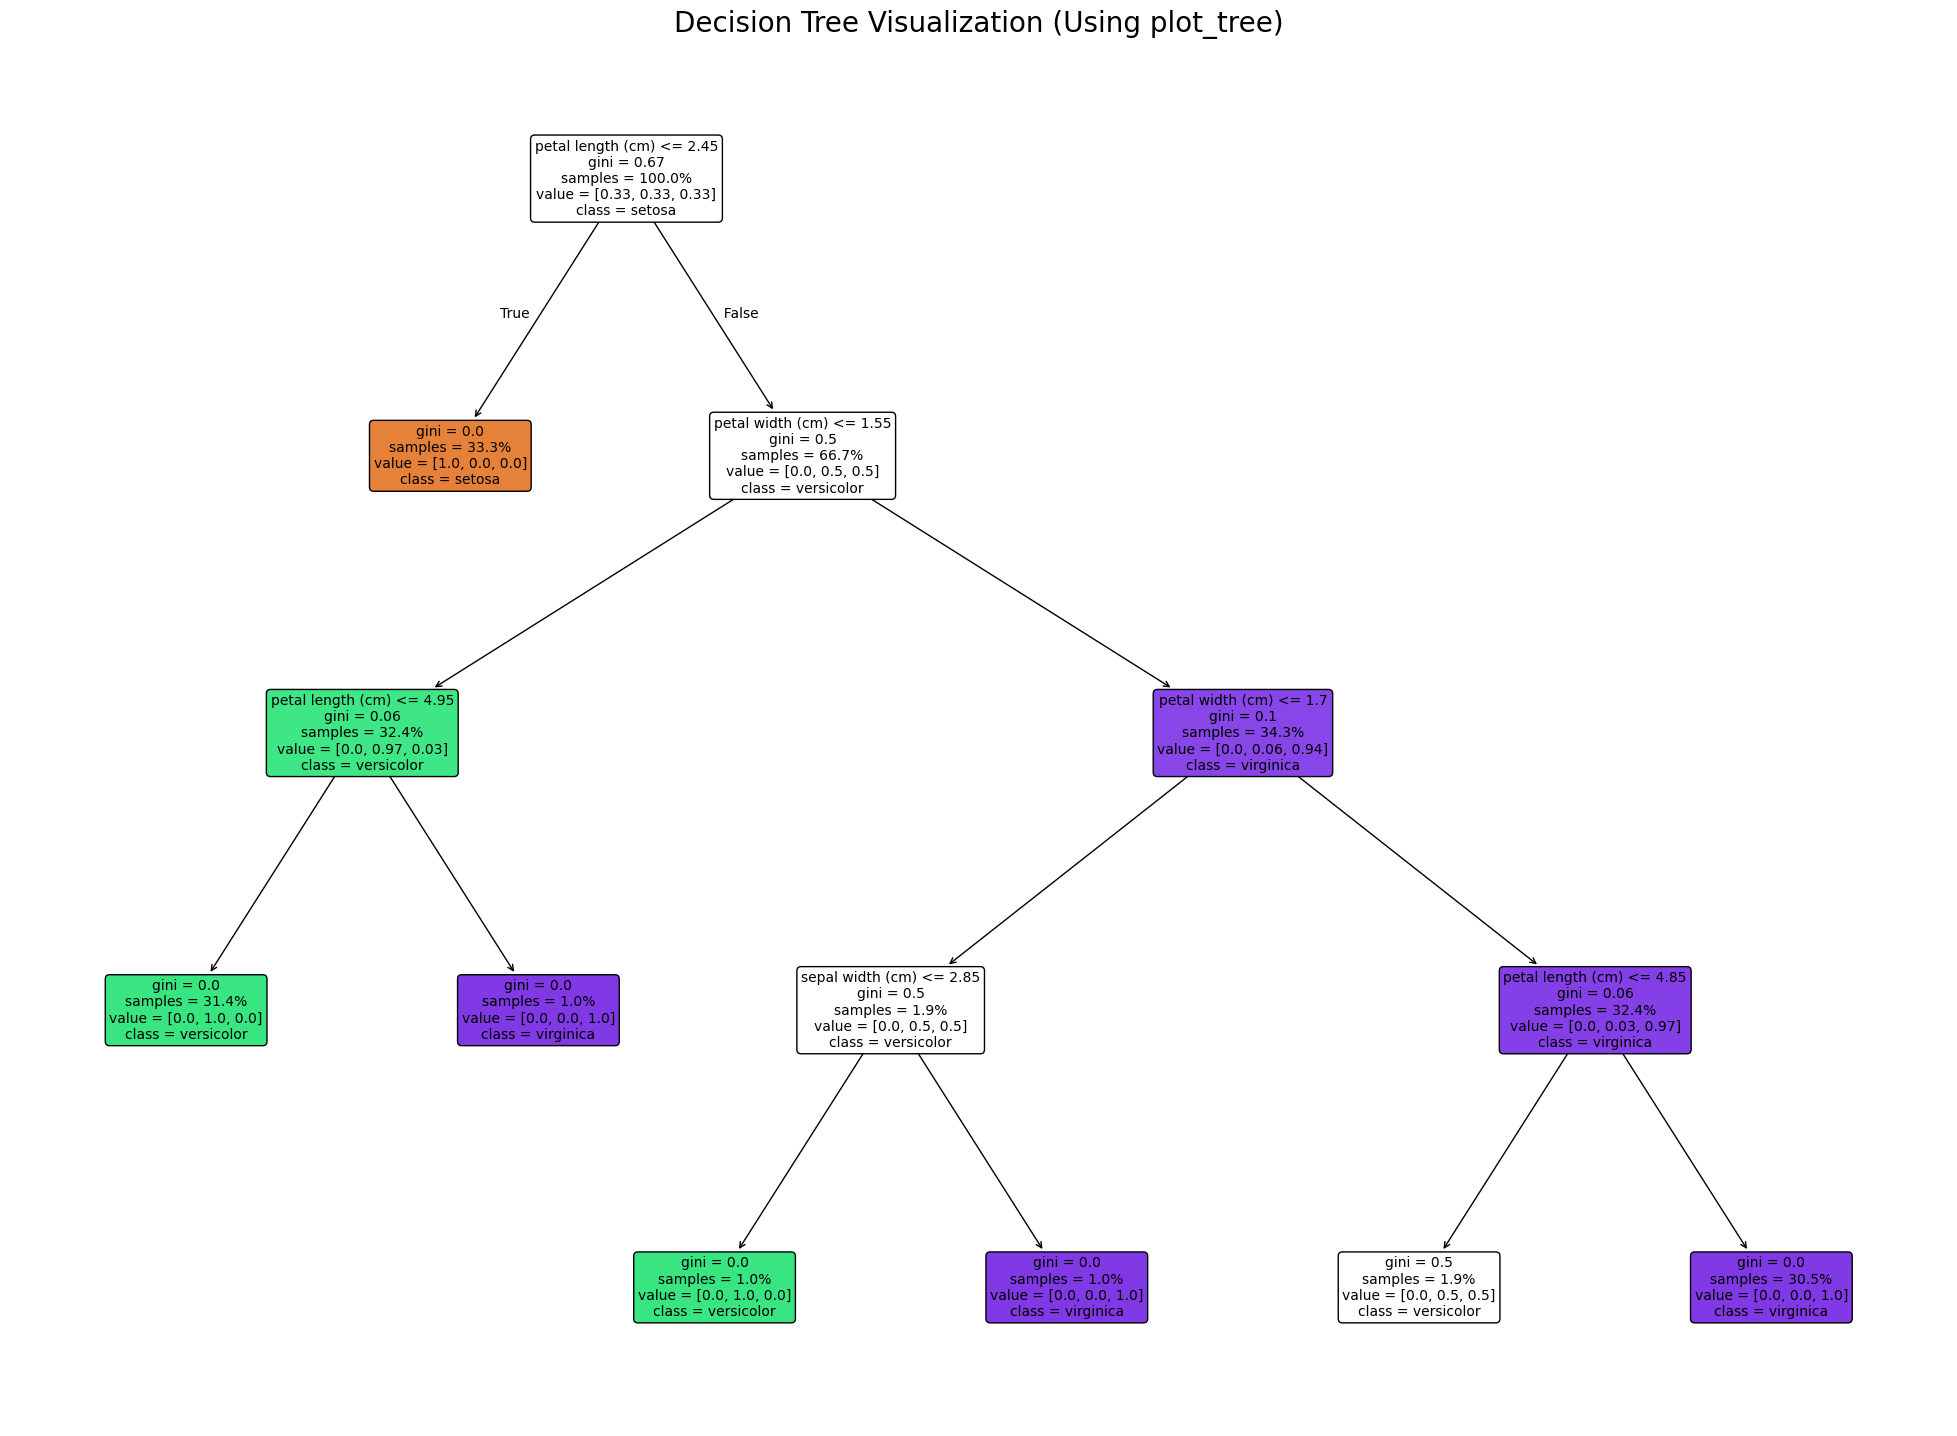

The Decision Tree visualization is displayed above. Each node shows the splitting criterion,
the Gini impurity, the number of samples at that node, and the distribution
of samples across classes (value). The predicted class for that node is also shown.
This visualization method is built into Scikit-learn and only requires Matplotlib.


In [17]:
'''6. Visualize Decision Tree'''

print("\n--- Decision Tree Visualization ---")

plt.figure(figsize=(25, 18)) 
plot_tree(dt_classifier,
          feature_names=iris.feature_names, 
          class_names=iris.target_names,    
          filled=True,                      
          rounded=True,                     
          fontsize=10,                      
          proportion=True,                  
          precision=2)                      
plt.title("Decision Tree Visualization (Using plot_tree)", fontsize=20)
plt.show()
print("The Decision Tree visualization is displayed above. Each node shows the splitting criterion,")
print("the Gini impurity, the number of samples at that node, and the distribution")
print("of samples across classes (value). The predicted class for that node is also shown.")
print("This visualization method is built into Scikit-learn and only requires Matplotlib.")

In [18]:
'''7. Analysis of the Model and Visualization'''
print("\n--- Model Analysis ---")
print("1. Accuracy:")
print(f"The model achieved an accuracy of {accuracy:.2f} on the test set. This indicates the proportion of correctly classified instances.")

print("\n2. Classification Report:")
print("  - Precision: The ability of the classifier not to label as positive a sample that is negative.")
print("  - Recall: The ability of the classifier to find all the positive samples.")
print("  - F1-score: A weighted harmonic mean of precision and recall, providing a single metric that balances both.")
print("  - Support: The number of actual occurrences of the class in the specified dataset.")
print("  The report shows how well the model performed for each individual class (setosa, versicolor, virginica).")

print("\n3. Confusion Matrix:")
print("  The confusion matrix provides a detailed breakdown of correct and incorrect classifications for each class.")
print("  For example, `conf_matrix[0,0]` shows how many actual 'setosa' flowers were correctly predicted as 'setosa'.")
print("  `conf_matrix[1,0]` would show how many actual 'versicolor' flowers were incorrectly predicted as 'setosa'.")

print("\n4. Decision Tree Visualization:")
print("  The visualization helps in understanding the decision-making logic of the model.")
print("  - Each internal node represents a test on a feature (e.g., 'petal length (cm) <= 2.45').")
print("  - Each branch represents the outcome of the test.")
print("  - Each leaf node represents a class label (the final decision) after all tests are applied.")
print("  - 'gini' indicates the impurity of the node. A lower Gini value means a purer node (more samples of a single class).")
print("  - 'samples' is the number of training samples that reached this node.")
print("  - 'value' shows the distribution of samples across classes at that node.")
print("  - 'class' indicates the majority class in that node, which would be the prediction if this were a leaf node.")
print("  By following the paths from the root to the leaves, you can trace the rules the model uses to classify new data points.")
print("For instance, if 'petal length (cm)' is very small, the tree quickly classifies it as 'setosa'.")
print("The `max_depth` parameter (set to 4 in this example) limits how deep the tree can grow, helping to prevent overfitting.")



--- Model Analysis ---
1. Accuracy:
The model achieved an accuracy of 0.89 on the test set. This indicates the proportion of correctly classified instances.

2. Classification Report:
  - Precision: The ability of the classifier not to label as positive a sample that is negative.
  - Recall: The ability of the classifier to find all the positive samples.
  - F1-score: A weighted harmonic mean of precision and recall, providing a single metric that balances both.
  - Support: The number of actual occurrences of the class in the specified dataset.
  The report shows how well the model performed for each individual class (setosa, versicolor, virginica).

3. Confusion Matrix:
  The confusion matrix provides a detailed breakdown of correct and incorrect classifications for each class.
  For example, `conf_matrix[0,0]` shows how many actual 'setosa' flowers were correctly predicted as 'setosa'.
  `conf_matrix[1,0]` would show how many actual 'versicolor' flowers were incorrectly predicted a